### Distribution Analysis

Distribution analysis is a key step in data exploration, helping you understand how data points are spread across a range of values.

**Visual Inspection**
- **Histograms**: Create histograms to see the frequency of different values. Look for patterns like skewness, modality, and outliers.
- **Box Plots**: Use box plots to visualize the median, quartiles, and outliers. This helps identify the spread and central tendency of the data.
- **KDE Plots**: Kernel Density Estimation plots provide a smoothed representation of the probability density function. They can reveal the shape and peaks of the distribution.

**Statistical Measures**
- **Mean and Median**: Calculate the mean (average) and median (middle value) to understand the central tendency.
- **Standard Deviation and Variance**: Measure the spread of the data. A high standard deviation indicates a wider spread.
- **Skewness**: Determine the skewness of the distribution. A positive skew means the tail on the right side is longer, while a negative skew means the tail on the left side is longer.
- **Kurtosis**: Measure the "tailedness" of the distribution. A high kurtosis indicates a heavy-tailed distribution with more extreme values.

**Common Distributions**

- **Normal Distribution (Gaussian)**: Symmetrical bell-shaped curve.
- **Uniform Distribution**: All values have equal probability.
- **Poisson Distribution**: Commonly used for count data (e.g., number of occurrences in a fixed interval).
- **Binomial Distribution**: Represents the number of successes in a fixed number of Bernoulli trials.
- **Exponential Distribution**: Often used for modeling waiting times or interarrival times.
- **Log-normal Distribution**: Useful for modeling variables that are log-normally distributed.


*Features to analyze* 
- Protocol
- Timestamp 
- Flow Duration
- Total Fwd Packets 
- Total Bwd Packets 
- Total length of Fwd Packet 
- Total length of Bwd Packet
- Flow bytes/s 
- Flow Packets/s
---

In [1]:
# Importing important libraries 
import pandas as pd 
import numpy as np
import os 
import json

import matplotlib.pyplot as plt
import seaborn as sns

**Functions**

In [2]:
# Functions

def read_data(data_path: str, usecols: list) -> pd.DataFrame:
    """
    This function reads the data from the data path
    """
    data = pd.read_csv(data_path, usecols=usecols)
    return data


def sturges_rule(data: pd.DataFrame) -> int:
    """
    This function calculates the number of bins for a histogram
    """
    n = len(data)
    k = 1 + 3.322 * np.log10(n)
    return int(k) # 


def freedman_dioconis_rule(data: pd.DataFrame) -> int:
    """
    This function calculates the number of bins for a histogram
    """
    n = len(data)
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    h = 2 * iqr / np.cbrt(n)
    k = (data.max() - data.min()) / h
    return int(k)
    

def save_plot(folder_name: str, file_name: str):
    """
    This function saves the plot
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    
    try:    
        plt.savefig(os.path.join(folder_name, file_name))
        print("Fig saved successfully!")
    except:
        print("Error in saving the figure")


def hist_plot(feature: str, bins: int, save: bool = True, 
                fig_size: tuple = (8, 6), density: bool = True, hist_color: str = '#a9bec3'):
    """
    This function plots the histogram for the given feature
    Also saves the plot as well
    """
    plt.figure(figsize=fig_size)

    # Hist func
    plt.hist(to_log(data[feature]), bins=bins, color = hist_color, density=density)

    plt.xlabel(f'Log of {feature}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} (Logarithmic Scale)')

    # Save plot
    if save:
        folder_name = 'histogram_plots'
        file_name = f'{feature.strip()}_hist.png'   
        save_plot(folder_name, file_name)

    plt.show()


def to_log(data: pd.DataFrame): 
    """
    This function takes the log of the data
    """
    return np.log10(data + 1) 


**Data**

In [3]:
# Read data from filepath 
# This file path is for temporary usage (For EDA)
# It will be removed once the task is completed 

file_path = "dataset.csv"
# Columns in this category
columns_to_read = ['Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
                    'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 
                    'Flow Bytes/s', 'Flow Packets/s']

# Read the data
try:
    data = read_data(file_path, usecols = columns_to_read)
    print(f"Successfully read {len(data.columns)} features")
except:
    print("File not found!")
    print("[INFO] Please place the dataset.csv in the directory for use!")

Successfully read 9 features


**Analysis**

---

### **Histograms**

Before we begin, its important to choose the right bin size for histogram. 

1. **To choose bin size, we ll utilize two rules:**
- Sturges' rule: 
    - Number of bins (k) = 1 + log2(n)
- Freedman-Diaconis rule: Takes in account data and interquartile range (IQR)
    - bin_width = 2 * IQR * n^(-1/3)
    - number_of_bins = (max(data) - min(data)) / bin_width

2. **Since these features have wide range of values ranging from 0 to millions. We will use log scaling to plot histogram**


In [4]:
data.nunique()

Protocol                            3
Timestamp                     3206589
Flow Duration                  616643
Total Fwd Packet                 5819
Total Bwd packets                6137
Total Length of Fwd Packet     209948
Total Length of Bwd Packet     122551
Flow Bytes/s                  2260437
Flow Packets/s                1222559
dtype: int64

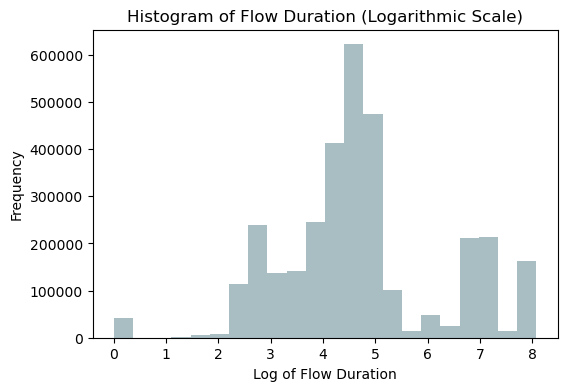

In [81]:
hist_plot('Flow Duration', fig_size=(6, 4), bins = sturges_rule(data=data), density=False, save=False)

> Right skewed distribution shows that majority of the network connections have short durations

> Long tail shows that there are a few longer-duration flows that could be studied further 

> The multiple peaks suggest that there might be different types of network traffic or usage patterns that contribute to the observed flow durations.

Fig saved successfully!


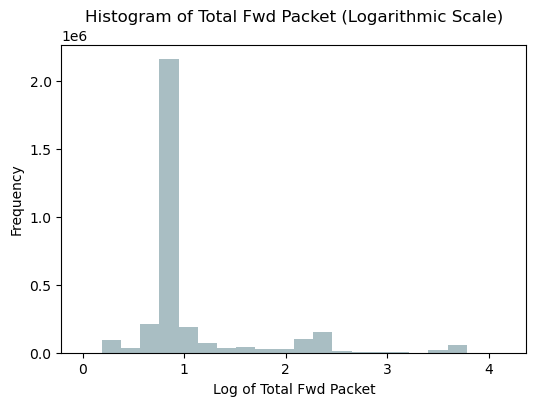

In [79]:
hist_plot('Total Fwd Packet', fig_size = (6,4), bins = sturges_rule(data=data), density=False, save=True)

> Right skewed distribution shows that majority of network connections have lower number of forward packets

> There are few connections with relatively higher number of forward packets

> The clustering around the 1-2 range suggests that there might be a common pattern or characteristic among these connections

Fig saved successfully!


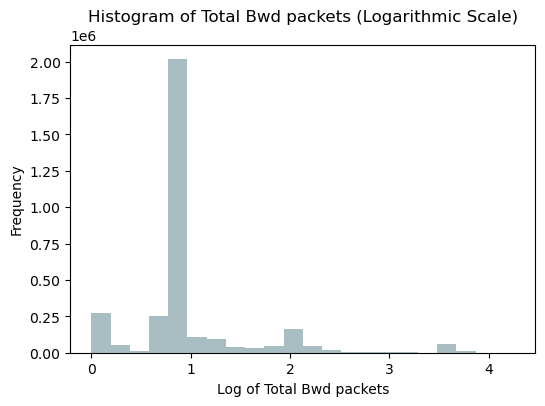

In [80]:
hist_plot('Total Bwd packets', fig_size = (6,4), bins = sturges_rule(data=data), density=False, save=True)

> Majority of the connections have low number of total backward packets 

> There are few samples where the number of backward packets is higher 

Fig saved successfully!


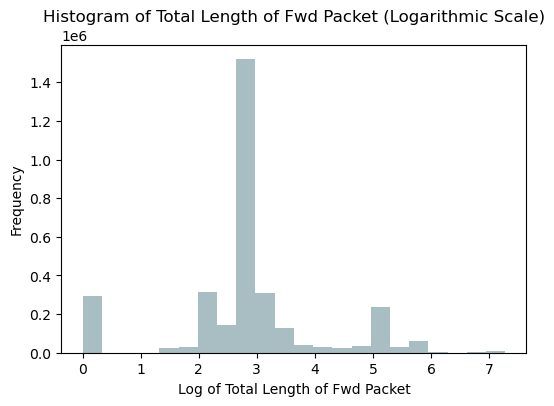

In [87]:
hist_plot('Total Length of Fwd Packet', fig_size=(6,4), bins = sturges_rule(data=data), density=False, save=True)   

> Right skewness shows most connections have relatively shorter forward packet lengths

> Long tail shows few values with higher lengths of network packets

Fig saved successfully!


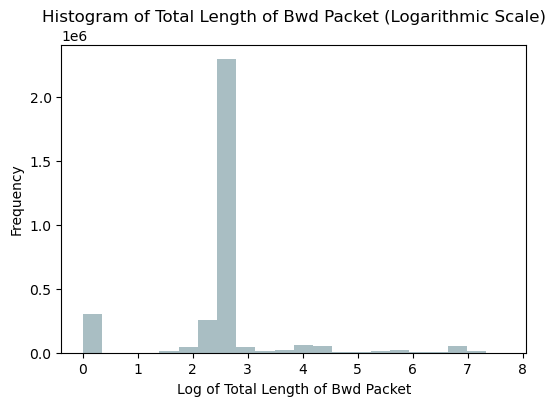

In [88]:
hist_plot('Total Length of Bwd Packet', fig_size=(6,4), bins = sturges_rule(data=data), density=False, save=True)   

> Similar insights as Total length of Fwd Packet

In [112]:
"""For column Flow Bytes/s and Flow Packets/s, we need to remove inf value from the dataset"""
df_flow_bytes = data['Flow Bytes/s'].drop(data[data['Flow Bytes/s'] == float('inf')].index)
df_flow_packets = data['Flow Packets/s'].drop(data[data['Flow Packets/s'] == float('inf')].index)

Fig saved successfully!


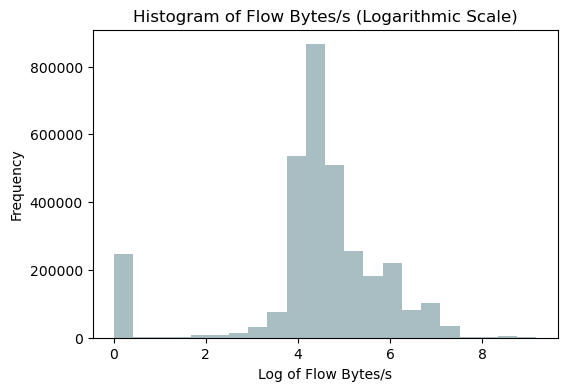

In [114]:
# Plot for Flow Bytes/s 
plt.figure(figsize=(6,4))
plt.hist(to_log(df_flow_bytes), bins=22, color = '#a9bec3', density=False)
plt.xlabel(f'Log of Flow Bytes/s')
plt.ylabel('Frequency')
plt.title(f'Histogram of Flow Bytes/s (Logarithmic Scale)')
# Save plot
save = True # Set true to save the plot
if save:
    folder_name = 'histogram_plots'
    file_name = f'FlowBytes_hist.png'   
    save_plot(folder_name, file_name) # Saves the plot

plt.show()

> Majority of flows have low bytes/s: low data transfer rate

> There are few flows with exceptionally very lower value of bytes/s and also some have higher values as well

> Clustering around 4-5 shows potential connection/relation 

Fig saved successfully!


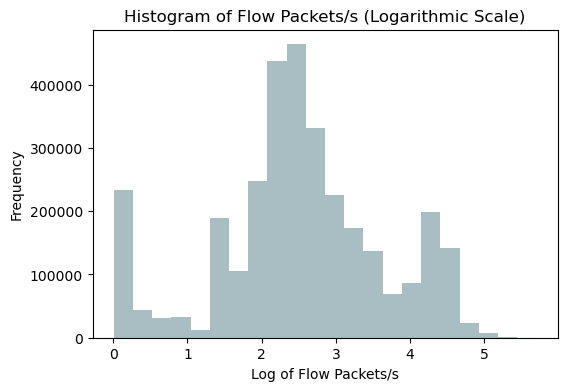

In [117]:
# Plot for Flow Packets/s 
plt.figure(figsize=(6,4))
plt.hist(to_log(df_flow_packets), bins=22, color = '#a9bec3', density=False)
plt.xlabel(f'Log of Flow Packets/s')
plt.ylabel('Frequency')
plt.title(f'Histogram of Flow Packets/s (Logarithmic Scale)')
# Save plot
save = True # Set true to save the plot
if save:
    folder_name = 'histogram_plots'
    file_name = f'FlowPackets_hist.png'   
    save_plot(folder_name, file_name) # Saves the plot

plt.show()

> Majority of flows have relatively lower packet rates 

> Multiple peaks indicate there are distinct groups/clusters in flow packet rates

> Although the distribution is right skewed, there are some values which have relatively very lower packet rates